# Data processing and feature engineering

In [1]:
# Import Libaries
import workshop_library as wl
import pandas as pd
import matplotlib.pyplot as plt
fontsize=20
from workshop_library import data_manager

# Graphics Settings
%matplotlib inline
import pylab
pylab.rcParams['figure.figsize'] = (20.0, 8.0)

## Load financial data from source

In [4]:
# Choose Data from SPY, VXX, MSFT, GLD, AAPL, DAX
df = wl.get_symbol('SPY')

In [5]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1995-01-03,45.703098,45.843700,45.687500,45.781200,30.121426,324300
1995-01-04,45.984299,46.000000,45.750000,46.000000,30.265385,351800
1995-01-05,46.031200,46.109299,45.953098,46.000000,30.265385,89800
1995-01-06,46.093700,46.250000,45.906200,46.046799,30.296181,448400
1995-01-09,46.031200,46.093700,46.000000,46.093700,30.327026,36800


In [6]:
# Add technical Indicators to the data
df = data_manager.add_technical_indicators(df=df, date_column = 'Date')

In [9]:
# calculate a volatility variable to see how easily technical indicators can be constructed
df['vola_3m'] = df['close'].pct_change().abs().rolling(window=60).mean()
df['direction_target'] = df['ret_1d'] > 0

In [10]:
#look at the data in tabular form
df.head()

,atr,tr,cci_20,rsv_30,rsv_60,rsv_12,rsv_7,rsv_5,wr_12,macd,...,mom_10_ma_50,mom_60_ma_100,mom_10_ma_100,mom_60_ma_200,mom_10_ma_200,ret_1d,ret_10d,ret_20d,vola_3m,direction_target
Date,,,,,,,,,,,,,,,,,,,,,
1995-01-03,NaN,NaN,NaN,59.987196,59.987196,59.987196,59.987196,59.987196,40.012804,0.000000,...,NaN,NaN,NaN,NaN,NaN,0.004779,0.027304,0.028669,NaN,True
1995-01-04,0.250000,0.250000,66.666667,100.000000,100.000000,100.000000,100.000000,100.000000,0.000000,0.004909,...,NaN,NaN,NaN,NaN,NaN,0.000000,0.021398,0.023437,NaN,False
1995-01-05,0.201363,0.156201,89.457451,74.087421,74.087421,74.087421,74.087421,74.087421,25.912579,0.006255,...,NaN,NaN,NaN,NaN,NaN,0.001017,0.015624,0.029550,NaN,True
1995-01-06,0.252401,0.343800,82.250204,63.875378,63.875378,63.875378,63.875378,63.875378,36.124622,0.008404,...,NaN,NaN,NaN,NaN,NaN,0.001019,0.010859,0.043095,NaN,True
1995-01-09,0.208213,0.093700,63.728443,72.213333,72.213333,72.213333,72.213333,72.213333,27.786667,0.011260,...,NaN,NaN,NaN,NaN,NaN,0.001017,0.012882,0.046440,NaN,True


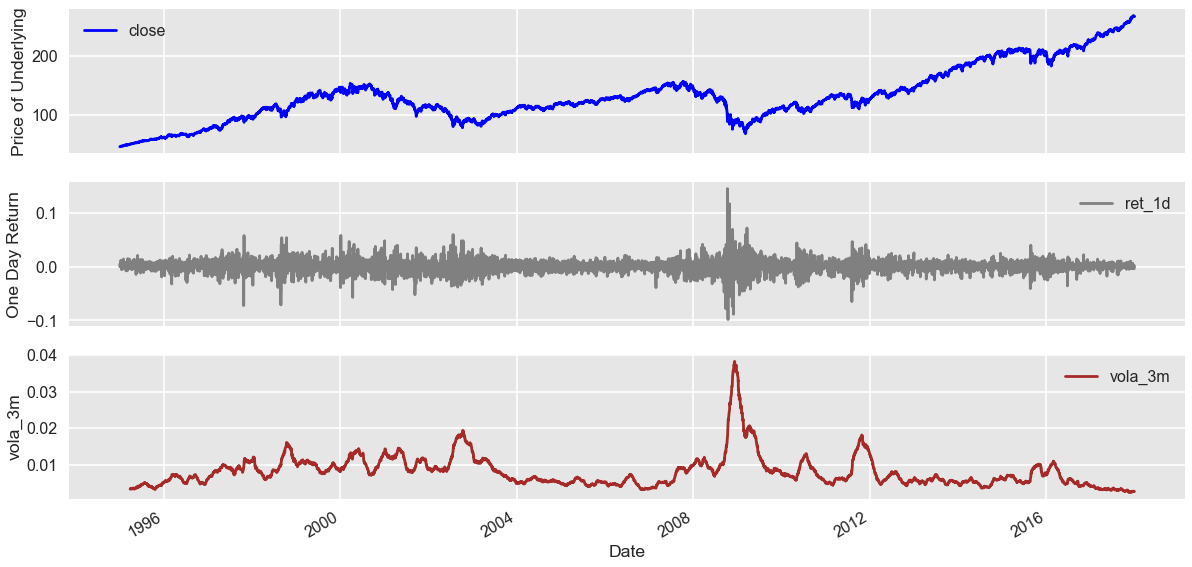

In [11]:
# Plot the underlying (e.g. DAX) Price series and some technical indicators
ax = df[['close', 'ret_1d', 'vola_3m']].plot(subplots=True, color = ['b', 'grey', 'brown'], figsize=(20,10))
ax[0].set_ylabel('Price of Underlying');
ax[1].set_ylabel('One Day Return');
ax[2].set_ylabel('vola_3m');

## For a better understanding, look into Technical Explaining Variables

> ### Note: We don't want to do technical chart analyses and come up with simple "if x then y" rules! But many technical indicators help the machine to understand what price movements are expected

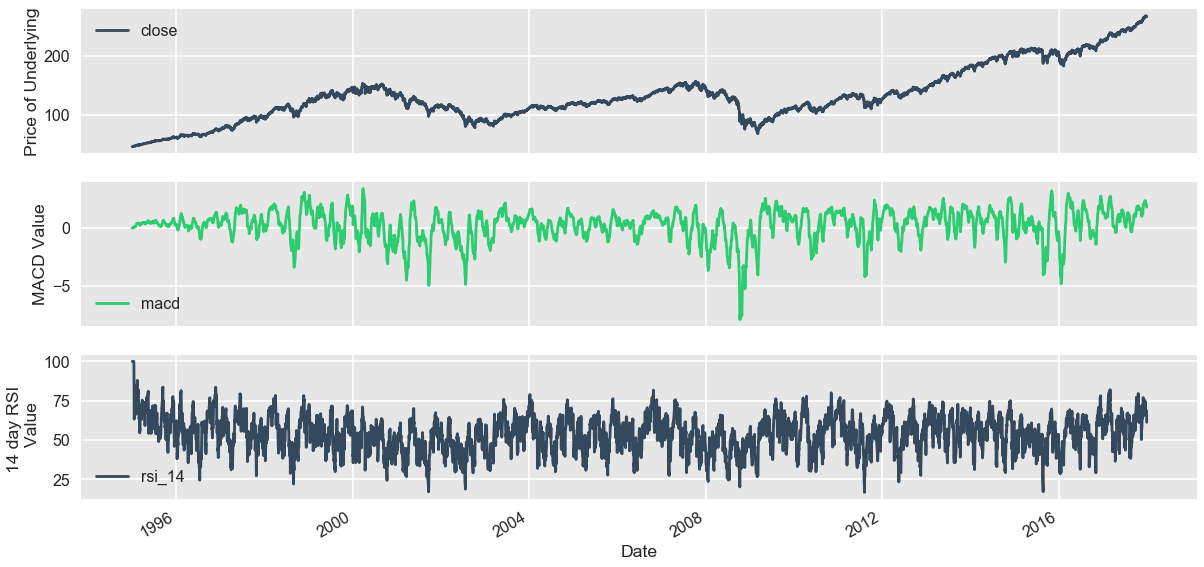

In [12]:
# Plot some technical indicators
ax = df[['close', 'macd', 'rsi_14']].plot(subplots = True, figsize=(20,10));
ax[0].set_ylabel('Price of Underlying');
ax[1].set_ylabel('MACD Value');
ax[2].set_ylabel('14 day RSI \n Value');